In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import sys
import cv2
import skimage

%matplotlib inline
from scipy import ndimage
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters import sobel, prewitt, scharr
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
from skimage import feature

### Reading the tiff file and selecting everything tenth frame

In [40]:
pwd

'/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/examples'

In [41]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [42]:
image = io.imread('../doc/ChCl_CA_DES_96_5_17_19.tiff')

In [43]:
image.shape

(3077, 120, 160)

In [7]:
selected_frames = image[0::10]

In [8]:
frames, height, width = selected_frames.shape
print(frames)
print(height)
print(width)

308
120
160


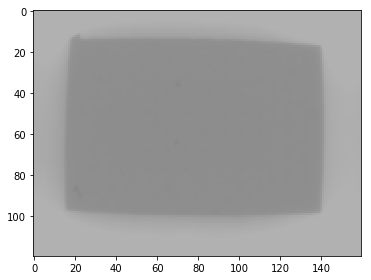

In [9]:
io.imshow(selected_frames[300])

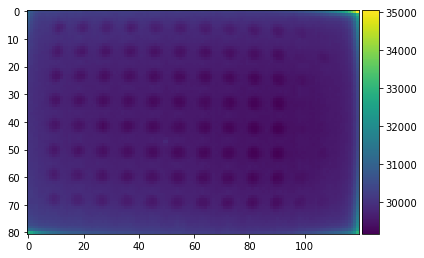

In [105]:
crop = selected_frames[100][17:98,20:140]
io.imshow(crop)

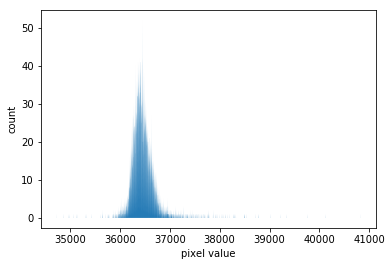

In [46]:
# Get the histogram data
hist_phase, bins_phase = skimage.exposure.histogram(crop)

# Use matplotlib to make a pretty plot of histogram data
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('pixel value')
ax.set_ylabel('count')
_ = ax.fill_between(bins_phase, hist_phase, alpha=5)

In [125]:
thresh_phase = 36500

# Generate thresholded image
img = crop < thresh_phase

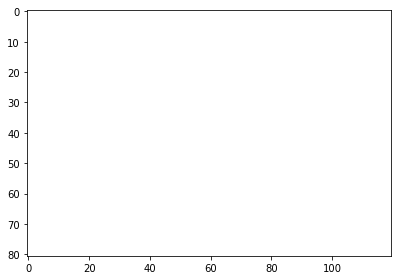

In [126]:
# Build RGB image by stacking grayscale images
img_rgb = np.dstack(3 * [img / np.max(img)])

# Saturate green channel wherever there are white pixels in thresh image
img_rgb[img, 1] = 1.0
io.imshow(img_rgb)

In [117]:
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)
gray.shape

error: OpenCV(4.1.0) ../modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


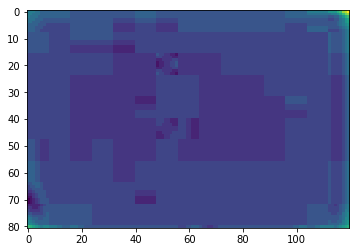

In [23]:
# cv2.imshow("g",gray)
# cv2.waitKey()
plt.imshow(gray)

In [16]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
th3 = ~th3
contours, hierarchy = cv2.findContours(th3, cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

In [17]:
# cv2.imshow('th',th3)
# cv2.waitKey()

In [18]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [-1,  5, -1, -1]]], dtype=int32)

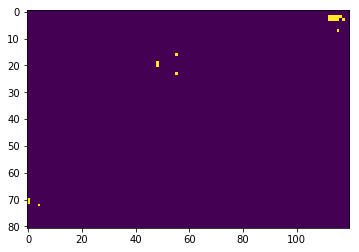

In [19]:
plt.imshow(th3)

In [48]:
edge = feature.canny(crop,sigma = 1)

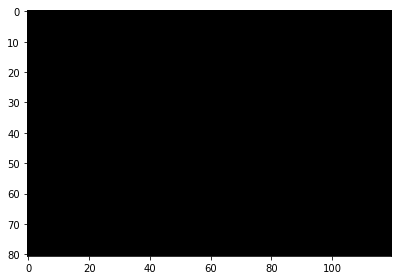

In [15]:
io.imshow(edge)

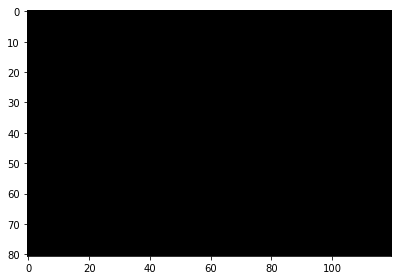

In [41]:
io.imshow(irtemp.edge_detection(crop,0))

In [42]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


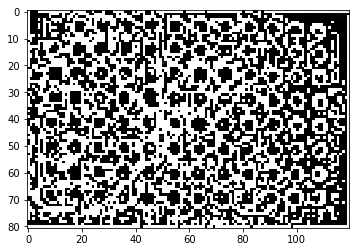

In [43]:
out_l = ndimage.convolve(crop, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

In [44]:
print(np.mean(out_l))

32194.897119341564


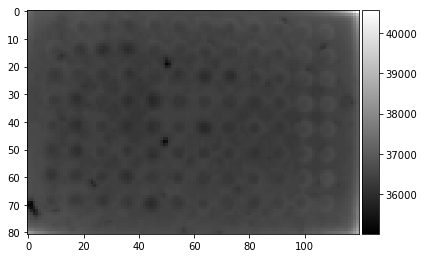

In [93]:
from scipy import ndimage as ndi
# gaus = ndi.gaussian_filter(crop,sigma=0.5)
# io.imshow(gaus,cmap='gray')

In [100]:
edge = feature.canny(crop,1)

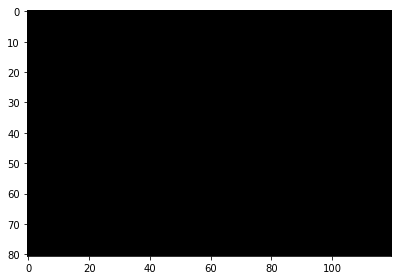

In [101]:
io.imshow(edge)

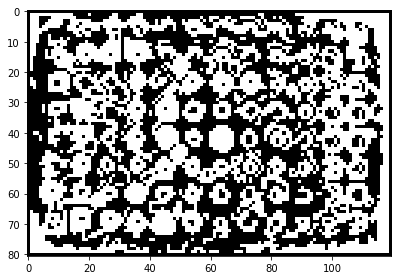

In [87]:
sob = sobel(gaus)>0.001
io.imshow(sob,cmap='gray')

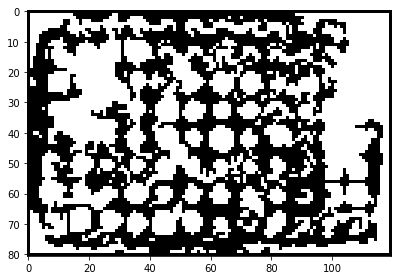

In [64]:
filled_wells = binary_fill_holes(sob)
io.imshow(filled_wells)

(-0.5, 119.5, 80.5, -0.5)

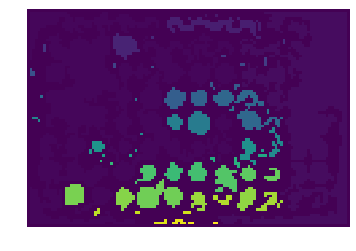

In [65]:
from skimage.measure import label

lab_wells = label(filled_wells)

fig, ax = plt.subplots()
ax.imshow(lab_wells*10, vmin=0)
ax.axis('off')

In [466]:
from skimage.measure import regionprops
import pandas as pd

props = regionprops(lab_wells, intensity_image=crop)
x = np.zeros(len(props))
y = np.zeros(len(props))
area = np.zeros(len(props))
perim = np.zeros(len(props))
intensity = np.zeros(len(props))

counter = 0
for prop in props:
    x[counter] = prop.centroid[0]
    y[counter] = prop.centroid[1]
    area[counter] = prop.area
    perim[counter] = prop.perimeter
    intensity[counter] = prop.mean_intensity
    
    counter += 1

regionprops = pd.DataFrame({'X': x, 'Y': y, 'Area': area,
                            'Perim': perim, 'Mean Intensity': intensity})

In [467]:
regionprops

,X,Y,Area,Perim,Mean Intensity
0,4.880734,29.752294,109.0,51.284271,30104.568807
1,4.472727,44.072727,55.0,25.313708,30019.545455
2,4.345455,54.072727,55.0,25.313708,29989.309091
3,4.345455,64.072727,55.0,25.313708,30010.163636
4,4.267857,74.250000,56.0,25.313708,30065.500000
5,4.275862,84.500000,58.0,26.142136,30041.568966
6,4.655172,94.655172,29.0,28.035534,30331.931034
7,4.433962,104.452830,53.0,23.899495,29991.962264
8,4.739130,114.608696,23.0,22.863961,30510.782609
9,2.000000,1.000000,1.0,0.000000,30931.000000


### Edge Detection

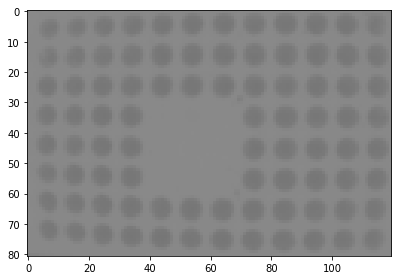

In [13]:
edge = []
for frame in selected_frames:
    frame = frame[30:111,20:140]
    edge.append(irtemp.edge_detection(frame, 0))
io.imshow(frame)

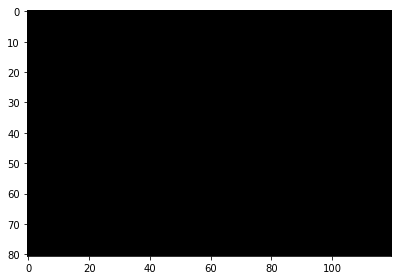

In [32]:
io.imshow(edge[0])